In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Da-vinci rates
cost_per_embedding = 0.2e-3
cost_per_completion = 0.02e-3

cost_training = 0.03e-3
cost_fine_tune = 0.12e-3

# # curie rates
# cost_per_embedding = 0.2e-4
# cost_per_completion = 0.02e-4

# cost_training = 0.03e-4
# cost_fine_tune = 0.12e-4

In [3]:
DOC_SIZE = 50000

# Approach 1: Use embeddings
fixed_cost = DOC_SIZE * cost_per_embedding
print("Fixed cost with approach 1: ", fixed_cost)

# context size
context_size = 100
query_length = 15
response_length = 25
variable_cost = query_length * cost_per_embedding + (context_size + query_length + response_length) * cost_per_completion
print("Variable cost with approach 1: ", variable_cost)

x = np.arange(1, 1e5)
y_approach1 = fixed_cost + variable_cost * x

Fixed cost with approach 1:  10.0
Variable cost with approach 1:  0.0058000000000000005


In [4]:
# Approach 2: Fine-tune a model

# create questions

# create 5 questions 10 times per context_size tokens
questions_per_context = 5 * 10
question_cost = DOC_SIZE / context_size * questions_per_context * (context_size + query_length) * cost_per_completion

# create answers
response_cost = DOC_SIZE / context_size * questions_per_context * (context_size + query_length + response_length) * cost_per_completion

# fine tune model (assume 4 passes through the dataset; default value)
fine_tune_cost = 4 * DOC_SIZE / context_size * questions_per_context * response_length * cost_training

# total fixed costs
fixed_cost = question_cost + response_cost + fine_tune_cost
print("Fixed cost with approach 2: ", fixed_cost)

# use model
variable_cost = (query_length + response_length) * cost_per_completion

y_approach2 = fixed_cost + variable_cost * x

Fixed cost with approach 2:  202.5


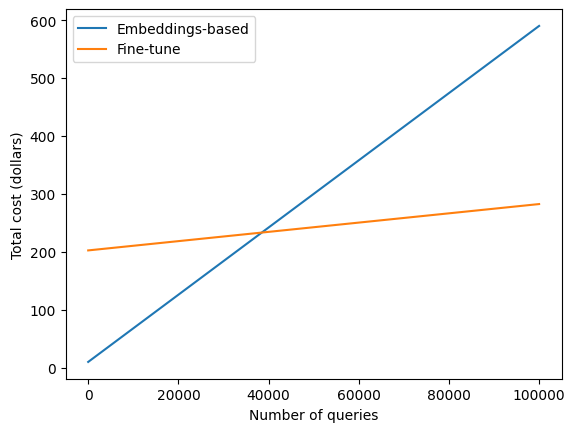

In [5]:
plt.plot(x, y_approach1, label='Embeddings-based')
plt.plot(x, y_approach2, label='Fine-tune')
plt.ylabel("Total cost (dollars)")
plt.xlabel("Number of queries")
plt.legend()
plt.savefig('cost_comparison.png', dpi=300)